# Speed Dating

This notebook uses a dataset from a former Kaggle comptetition [Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)
The goal is to understand the main factors during a speed dating and especially to understand what will influence the obtaining of a **second date**.


In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## First Analysis of the Data Set

In [3]:
full_dataset = pd.read_csv('Speed Dating Data.csv' , encoding = 'ISO-8859-1')
full_dataset.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
list_columns = full_dataset.columns

In [5]:
for elem in list_columns:
    print(elem)

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [6]:
full_dataset.shape

(8378, 195)

As we can see, there is a lot a factors compiled in this dataset.

## 1. Cleaning Nan

In [7]:
full_dataset.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [8]:
df_nan = full_dataset.isnull().sum().to_frame().transpose()
df_nan

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,...,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


In [9]:
# drop every column of the dataset with more than 50% NaN
for i in full_dataset.columns:
    if df_nan.loc[0,i] > full_dataset.shape[0]*0.50 :
        del full_dataset[i]

In [10]:
full_dataset.isnull().sum().to_frame().transpose()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,0,1,0,0,0,0,0,0,1846,0,...,915,915,915,915,915,4001,4001,4001,4001,4001


In [15]:
full_dataset.to_csv('speed_dating_dataviz.csv', index =False)

# 2. Identifying main factors for second date

In [15]:
# built correlation matrix of the dataset
corr = full_dataset.corr()

In [20]:
# restrict to "match" column (0 = No , 1 = Yes)
df = corr.loc[:, ['match']]
df

,match
iid,-0.015806
id,-0.000770
gender,-0.000530
idg,-0.000544
condtn,-0.045960
...,...
attr5_2,0.003578
sinc5_2,0.009049
intel5_2,-0.006038
fun5_2,0.035596


In [21]:
# most proeminent correlations (> 0.20)
mask = df['match'] > 0.2
df.loc[mask, 'match'].sort_values(ascending = False)

match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.305853
like      0.305723
fun_o     0.277700
fun       0.277545
shar_o    0.270840
shar      0.270679
attr_o    0.260837
attr      0.260676
prob_o    0.255574
prob      0.255531
Name: match, dtype: float64

In [22]:
df.loc[mask, 'match'].count()

13

In [23]:
df.loc[mask, ['match']].transpose()

,match,dec_o,attr_o,fun_o,shar_o,like_o,prob_o,dec,attr,fun,shar,like,prob
match,1.0,0.522326,0.260837,0.2777,0.27084,0.305853,0.255574,0.521943,0.260676,0.277545,0.270679,0.305723,0.255531


In [24]:
list_column_choice = df.loc[mask, ['match']].transpose().columns.to_list()
list_column_choice

['match',
 'dec_o',
 'attr_o',
 'fun_o',
 'shar_o',
 'like_o',
 'prob_o',
 'dec',
 'attr',
 'fun',
 'shar',
 'like',
 'prob']

In [25]:
# Restrict our dataset to the more correlated variables with match
dataset = full_dataset.loc[: , list_column_choice]
dataset

,match,dec_o,attr_o,fun_o,shar_o,like_o,prob_o,dec,attr,fun,shar,like,prob
0,0,0,6.0,8.0,6.0,7.0,4.0,1,6.0,7.0,5.0,7.0,6.0
1,0,0,7.0,7.0,5.0,8.0,4.0,1,7.0,8.0,6.0,7.0,5.0
2,1,1,10.0,10.0,10.0,10.0,10.0,1,5.0,8.0,7.0,7.0,NaN
3,1,1,7.0,8.0,8.0,7.0,7.0,1,7.0,7.0,8.0,7.0,6.0
4,1,1,8.0,6.0,7.0,8.0,6.0,1,5.0,7.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,1,10.0,2.0,5.0,6.0,1.0,0,3.0,5.0,NaN,2.0,5.0
8374,0,0,6.0,3.0,2.0,2.0,2.0,0,4.0,4.0,NaN,4.0,4.0
8375,0,0,2.0,2.0,1.0,2.0,1.0,0,4.0,8.0,NaN,6.0,5.0
8376,0,1,5.0,5.0,6.0,6.0,4.0,0,4.0,4.0,5.0,5.0,5.0


In [26]:
dataset.isnull().sum()

match        0
dec_o        0
attr_o     212
fun_o      360
shar_o    1076
like_o     250
prob_o     318
dec          0
attr       202
fun        350
shar      1067
like       240
prob       309
dtype: int64

In [27]:
# replace Nan by median value
list_columns_median = ['attr_o','fun_o','shar_o','like_o','prob_o','attr','fun','shar','like','prob']
df = dataset.loc[: , list_columns_median]

In [28]:
for i in list_columns_median:
    print(round(df[i].median()))
    dataset[i].replace(np.nan, round(dataset[i].median()) , inplace = True)

6
7
6
6
5
6
7
6
6
5


In [29]:
dataset.isnull().sum()

match     0
dec_o     0
attr_o    0
fun_o     0
shar_o    0
like_o    0
prob_o    0
dec       0
attr      0
fun       0
shar      0
like      0
prob      0
dtype: int64

In [40]:
# copy dataset in another variable
dataset_reduit = dataset

,match,decision_pretendant,attirance pretendant,humour pretendant,interets_communs_pretendant,appreciation_pretendant,niveau_confiance_pretendant,decision_bachelor,attirance_bachelor,humour_bachelor,interets_communs_bachelor,appreciation_bachelor,niveau_confiance_bachelor
0,0,0,6.0,8.0,6.0,7.0,4.0,1,6.0,7.0,5.0,7.0,6.0
1,0,0,7.0,7.0,5.0,8.0,4.0,1,7.0,8.0,6.0,7.0,5.0
2,1,1,10.0,10.0,10.0,10.0,10.0,1,5.0,8.0,7.0,7.0,5.0
3,1,1,7.0,8.0,8.0,7.0,7.0,1,7.0,7.0,8.0,7.0,6.0
4,1,1,8.0,6.0,7.0,8.0,6.0,1,5.0,7.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,1,10.0,2.0,5.0,6.0,1.0,0,3.0,5.0,6.0,2.0,5.0
8374,0,0,6.0,3.0,2.0,2.0,2.0,0,4.0,4.0,6.0,4.0,4.0
8375,0,0,2.0,2.0,1.0,2.0,1.0,0,4.0,8.0,6.0,6.0,5.0
8376,0,1,5.0,5.0,6.0,6.0,4.0,0,4.0,4.0,5.0,5.0,5.0


#### Let us now rename columns with more easy to understand names: 
- Here the bachelor is the one (he or she) who receives the pretendant
- pretendant_humor is the humor score of the pretendant from the bachelor point of view

A match for second date is when both pretendant and bachelor decision is equal to one.

In [42]:


columns_old = ['match', 'dec_o', 'attr_o', 'fun_o', 'shar_o', 'like_o','prob_o', 'dec', 'attr', 'fun', 'shar', 'like', 'prob']
columns_new = ['match', 'pretendant_decision', 'pretendant_attirance', 'pretendant_humor', 'pretendant_common_interests', 'pretendant_appreciation', 'pretendant_confidence_level' , 'bachelor_decision', 'bachelor_attirance',
'bachelor_humor', 'bachelor_common_interests', 'bachelor_appreciation', 'bachelor_confidence_level']

dataset_reduit.columns = columns_new

In [43]:
dataset_reduit.head(10)

,match,pretendant_decision,pretendant_attirance,pretendant_humor,pretendant_common_interests,pretendant_appreciation,pretendant_confidence_level,bachelor_decision,bachelor_attirance,bachelor_humor,bachelor_common_interests,bachelor_appreciation,bachelor_confidence_level
0,0,0,6.0,8.0,6.0,7.0,4.0,1,6.0,7.0,5.0,7.0,6.0
1,0,0,7.0,7.0,5.0,8.0,4.0,1,7.0,8.0,6.0,7.0,5.0
2,1,1,10.0,10.0,10.0,10.0,10.0,1,5.0,8.0,7.0,7.0,5.0
3,1,1,7.0,8.0,8.0,7.0,7.0,1,7.0,7.0,8.0,7.0,6.0
4,1,1,8.0,6.0,7.0,8.0,6.0,1,5.0,7.0,6.0,6.0,6.0
5,0,1,7.0,8.0,7.0,7.0,6.0,0,4.0,4.0,4.0,6.0,5.0
6,0,0,3.0,5.0,7.0,2.0,1.0,1,7.0,4.0,7.0,6.0,5.0
7,0,0,6.0,6.0,6.0,7.0,5.0,0,4.0,6.0,6.0,6.0,7.0
8,1,1,7.0,8.0,9.0,6.5,8.0,1,7.0,9.0,8.0,7.0,7.0
9,0,0,6.0,6.0,6.0,6.0,6.0,1,5.0,8.0,8.0,6.0,6.0


# 3. Visualization of correlations

We are now going to analyse graphically each pair of correlated variables (match,X) for X in other columns

<AxesSubplot:>

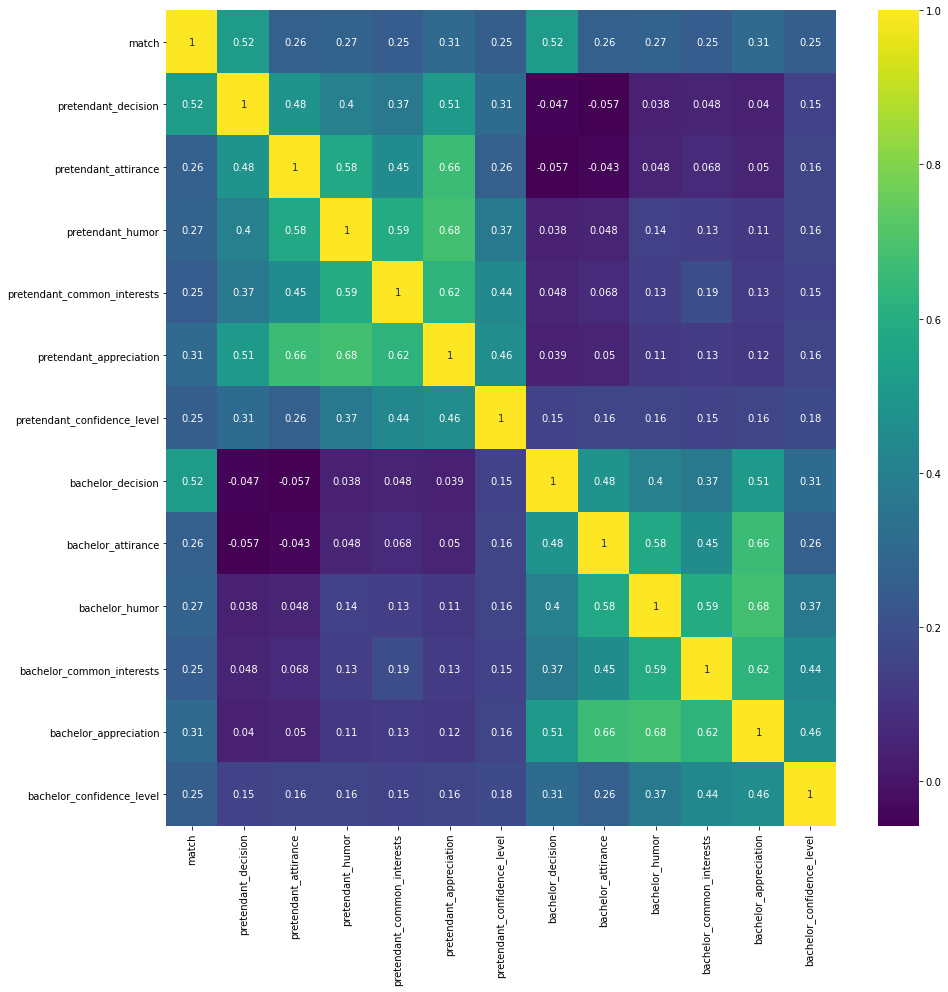

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_reduit.corr(), annot = True, cmap = 'viridis')

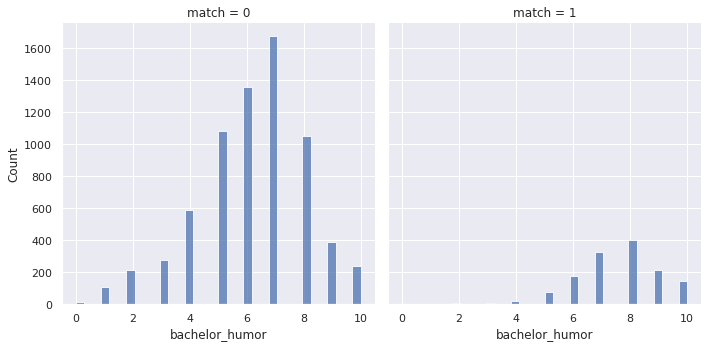

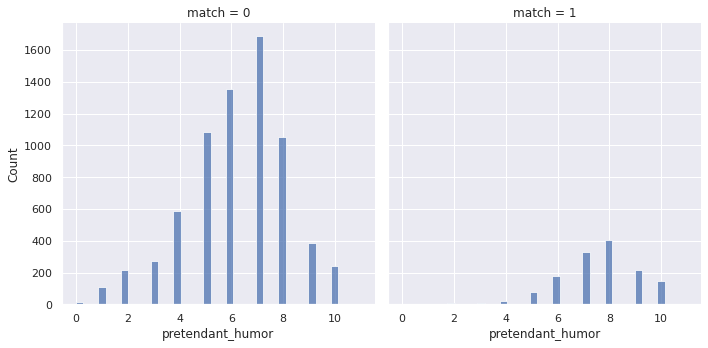

In [64]:
sns.displot(dataset_reduit, x="bachelor_humor", col="match", multiple="dodge")
sns.displot(dataset_reduit, x="pretendant_humor", col="match", multiple="dodge")

Having humor does not imply a second rendez-vous. However, a score of humor less than 6 reduces drastically the probability to have a second rendez-vous.

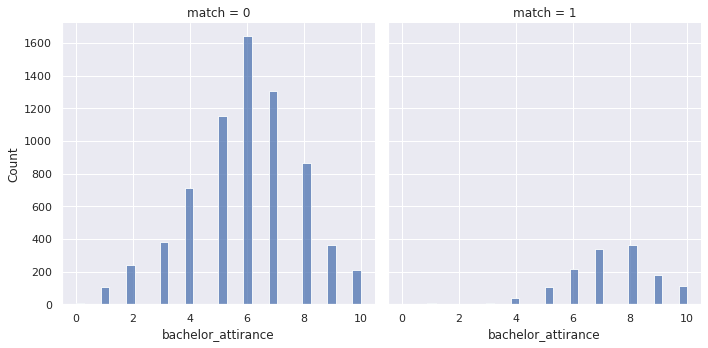

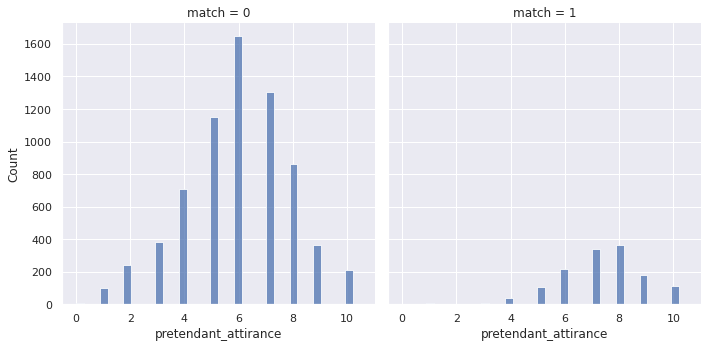

In [63]:
sns.displot(dataset_reduit, x="bachelor_attirance", col="match", multiple="dodge")
sns.displot(dataset_reduit, x="pretendant_attirance", col="match", multiple="dodge")

Physical attirance seems to be a weak factor as many pretendant and bachelor have good physical attirance score without a second date.

# 3. Other interesting factors

In [69]:
### Age

In [67]:
data_age = full_dataset.loc[:, ['match', 'age_o', 'age']]

In [68]:
data_age.head()

,match,age_o,age
0,0,27.0,21.0
1,0,22.0,21.0
2,1,22.0,21.0
3,1,23.0,21.0
4,1,24.0,21.0


In [71]:
data_age.shape

(8378, 3)

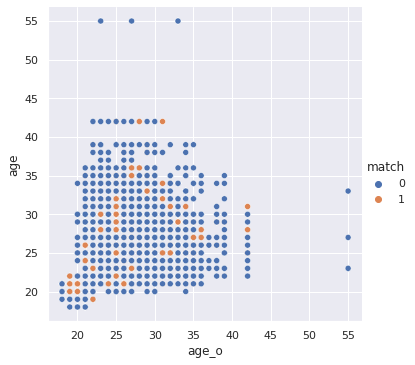

In [70]:
sns.relplot(x = 'age_o' , y = 'age' , data = data_age, hue = 'match')

Strong age gap implies matching 0, which is not surprising

In [17]:
data_race = full_dataset.loc[:, ['match', 'samerace']]
data_race

,match,samerace
0,0,0
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
8373,0,0
8374,0,0
8375,0,0
8376,0,0


In [19]:
data_race.describe()

,match,samerace
count,8378.000000,8378.000000
mean,0.164717,0.395799
std,0.370947,0.489051
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [21]:
data_race['samerace'].value_counts()

0    5062
1    3316
Name: samerace, dtype: int64

In [23]:
data_same_race = data_race[data_race['samerace'] == 1]
data_diff_race = data_race[data_race['samerace'] == 0].sample(3316)

In [25]:
data_race_equi = data_same_race.append(data_diff_race)
data_race_equi['samerace'].value_counts()

1    3316
0    3316
Name: samerace, dtype: int64

In [27]:
data_race_equi[data_race_equi['samerace'] == 1]['match'].value_counts()

0    2750
1     566
Name: match, dtype: int64

In [28]:
data_race_equi[data_race_equi['samerace'] == 0]['match'].value_counts()

0    2778
1     538
Name: match, dtype: int64

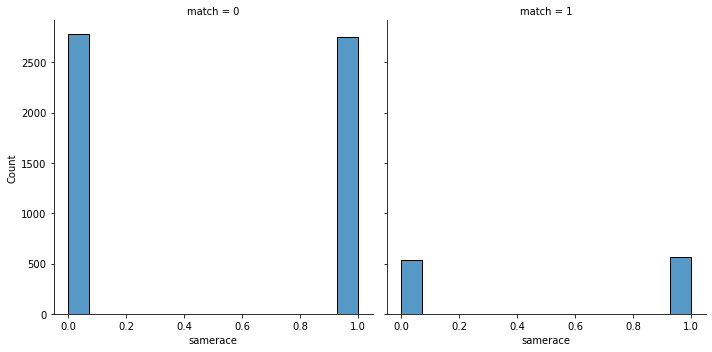

In [26]:
sns.displot(data_race_equi, x="samerace", col="match", multiple="dodge")

The fact to be of the same ethnic origin is a weak criteria for matching; there is slightly more candidate with samerace =1 than others who match. 
